In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sqlite3

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Загрузка датасета и сохранение его в БД

In [26]:
df = pd.read_csv("datasets/train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [27]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Задание 1.1. Создаем базу данных и записываем в нее DataSet

In [131]:
conn = sqlite3.connect("PhonePrice.db")
df.to_sql("user", con=conn, if_exists="append", index=False)

2000

# Задание 1.2. С помощью модели разделяем данные на кластеры и записываем их в таблицу

In [55]:
kmeans = KMeans(n_clusters=3)

In [56]:
pca = PCA(n_components=2)
df_2d = pca.fit_transform(df)

In [72]:
kmeans.fit(df_2d)

DBSCAN()

In [74]:
labels = kmeans.fit_predict(df)

C:\Users\demoexam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


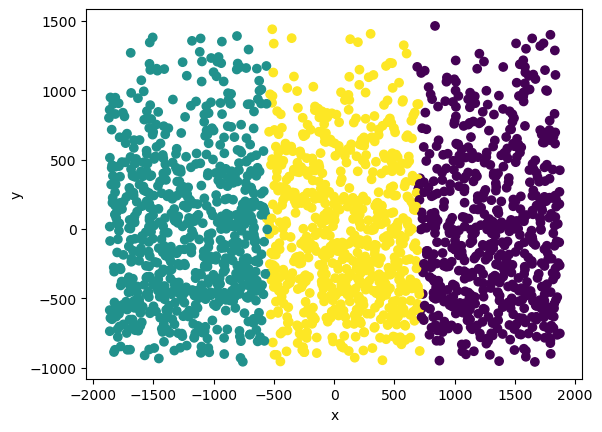

In [75]:
plt.scatter(df_2d[:, 0], df_2d[:, 1], c=labels, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [125]:
labels = pd.Series(labels)

In [126]:
labels

0       2
1       2
2       2
3       2
4       1
       ..
1995    1
1996    2
1997    0
1998    1
1999    0
Length: 2000, dtype: int32

In [127]:
labels.name = "cluster"
data = pd.concat([df, labels], axis=1)

In [128]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,cluster
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,2
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1890,668,13,4,19,1,1,0,0,1
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,1965,2032,11,10,16,1,1,1,2,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,1632,3057,9,1,5,1,1,0,3,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,670,869,18,10,19,1,1,1,0,1


# Задание 1.3. Делаем таблицу в редакторе таблиц и смотрим ее. Так же смотрим на сколько в DataSet отклоняются значения

In [61]:
describtions = pd.read_csv("describtions.csv")

In [62]:
describtions

,Название,Перевод,Описание,Тип данных,Система счисления,Unnamed: 5,Unnamed: 6
0,battery_power,заряд батареи,"Общая энергия, которую аккумулятор может храни...",int,-,NaN,NaN
1,blue,синий,С Bluetooth или нет,int,-,NaN,NaN
2,clock_speed,тактовая частота,Скорость выполнения инструкций микропроцессором,float,Мгц,NaN,NaN
3,dual_sim,две SIM-карты,Поддержка двух SIM-карт,int,-,NaN,NaN
4,fc,FC,Мегапиксели фронтальной камеры,int,Мп,NaN,NaN
5,four_g,четыре G,Поддержка 4G или нет,int,-,NaN,NaN
6,int_memory,встроенная память,Внутренняя память (гигабайты),int,ГБ,NaN,NaN
7,m_dep,мdep,Глубина мобильного телефона (см),float,см,NaN,NaN
8,mobile_wt,вес мобильного телефона,Вес мобильного телефона,int,г,NaN,NaN
9,n_cores,количество ядер,Количество ядер процессора,int,-,NaN,NaN


# Проверка на отклонение от нормы значений и визуализация значений

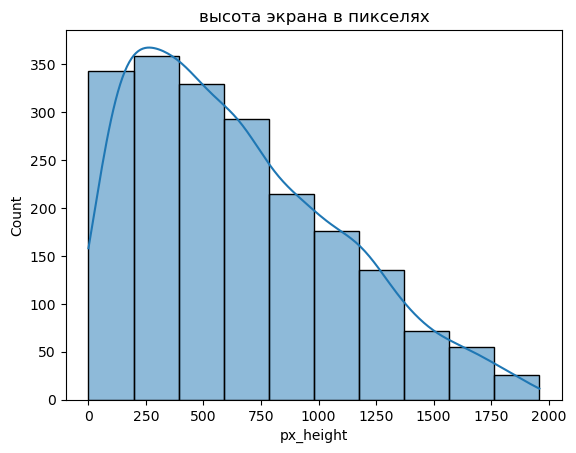

In [84]:
sb.histplot(data['px_height'], bins=10, kde=True)
plt.title('высота экрана в пикселях')
plt.show()

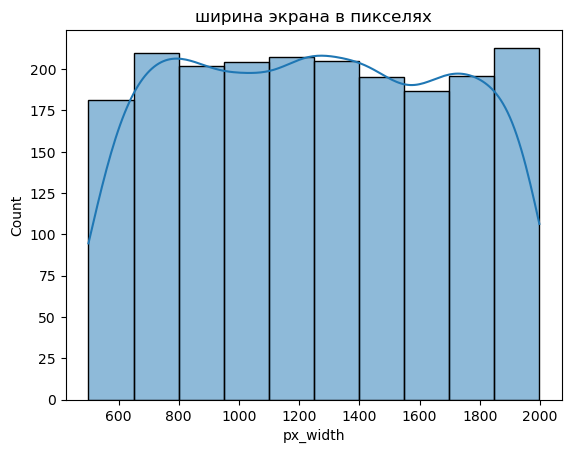

In [85]:
sb.histplot(data['px_width'], bins=10, kde=True)
plt.title('ширина экрана в пикселях')
plt.show()

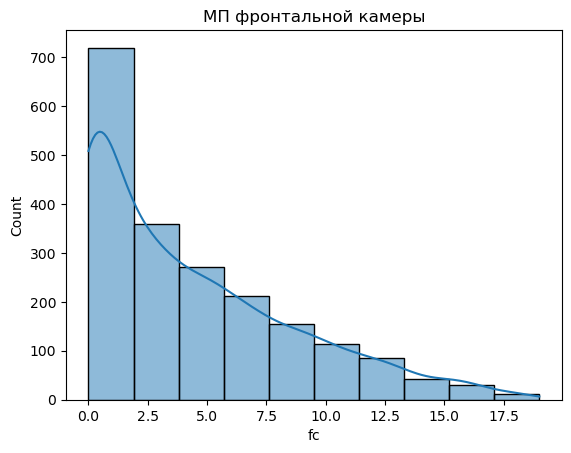

In [86]:
sb.histplot(data['fc'], bins=10, kde=True)
plt.title('МП фронтальной камеры')
plt.show()

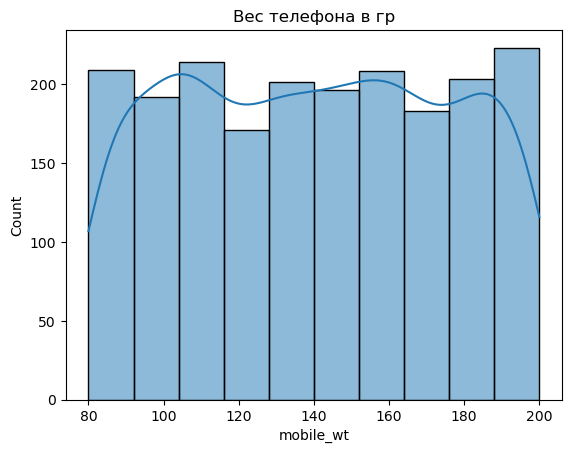

In [88]:
sb.histplot(data['mobile_wt'], bins=10, kde=True)
plt.title('Вес телефона в гр')
plt.show()

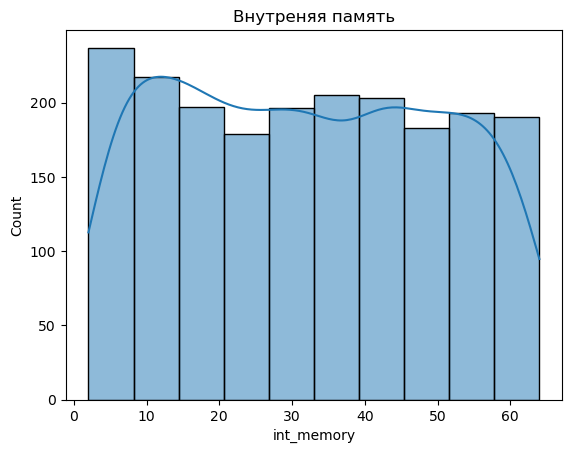

In [89]:
sb.histplot(data['int_memory'], bins=10, kde=True)
plt.title('Внутреняя память')
plt.show()

# Задание 1.4. Смотрим данные по заданию

In [90]:
data.groupby("cluster")['price_range'].sum()

cluster
0     234
1    1674
2    1092
Name: price_range, dtype: int64

In [97]:
data.groupby("cluster")['clock_speed'].sum()

cluster
0    1088.3
1     918.7
2    1037.5
Name: clock_speed, dtype: float64

# Задание 1.5. Выбираем нужные нам данные и удаляем не нужные

Обучаем простую модель, для определния того, какие данные она использует

In [108]:
y = data['price_range']
X = data.drop('price_range', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
tree = DecisionTreeClassifier()

In [110]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [136]:
for i, importance in enumerate(tree.feature_importances_):
    print(f'Значимость: {importance.round(3)}, признак: {data.columns[i]}')

Значимость: 0.129, признак: battery_power
Значимость: 0.002, признак: blue
Значимость: 0.011, признак: clock_speed
Значимость: 0.001, признак: dual_sim
Значимость: 0.006, признак: fc
Значимость: 0.0, признак: four_g
Значимость: 0.007, признак: int_memory
Значимость: 0.011, признак: m_dep
Значимость: 0.018, признак: mobile_wt
Значимость: 0.011, признак: n_cores
Значимость: 0.005, признак: pc
Значимость: 0.081, признак: px_height
Значимость: 0.073, признак: px_width
Значимость: 0.625, признак: ram
Значимость: 0.004, признак: sc_h
Значимость: 0.004, признак: sc_w
Значимость: 0.008, признак: talk_time
Значимость: 0.0, признак: three_g
Значимость: 0.003, признак: touch_screen
Значимость: 0.0, признак: wifi
Значимость: 0.0, признак: price_range


##  Визуализируем значимость каждого признака

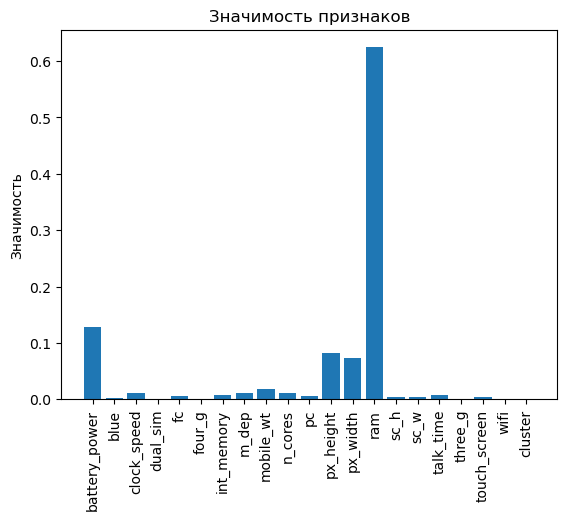

In [147]:
plt.bar(list(X_train.columns), tree.feature_importances_, )
plt.xticks(rotation=90)
plt.ylabel('Значимость')
plt.title('Значимость признаков')
plt.show()

In [116]:
cor = data.corr()

<Axes: >

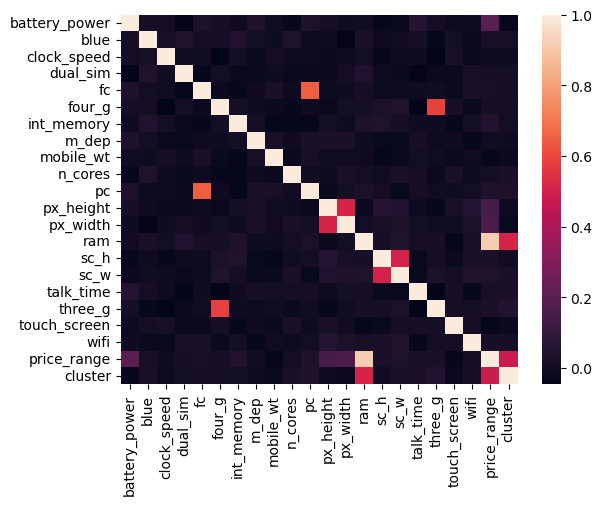

In [117]:
sb.heatmap(cor)

Все признаки которые меньше всего влияют на "price_range" удаляем, кроме "cluster", так как он нам ещё понадобится

In [129]:
clean_data = data[['px_height', 'px_width', 'ram', 'cluster']]

сохраняем новый датасет в базу данных

In [133]:
clean_data.to_sql("clean_data", con=conn, if_exists="append", index=False)

2000